In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
def f(x,y):
    f = np.sqrt(1 + 4*(x**2) + y**2)
    return(f)

def gradf(x,y):
    grad = np.zeros((2,1))
    grad[0,0] = 4*x / np.sqrt(1 + 4*(x**2) + y**2)
    grad[1,0] = y / np.sqrt(1 + 4*(x**2) + y**2)
    return(grad)
           
def Hessf(x,y):
    Hess = np.zeros((2,2))
    Hess[0,0] = ( 4 /  np.sqrt(1 + 4*(x**2) + y**2) )  - ( 16*(x**2) /  np.power(1 + 4*(x**2) + y**2, 1.5) )
    Hess[0,1] = - 4*x*y / np.power(1 + 4*(x**2) + y**2, 1.5)
    Hess[1,0] = - 4*x*y / np.power(1 + 4*(x**2) + y**2, 1.5)
    Hess[1,1] = ( 1 /  np.sqrt(1 + 4*(x**2) + y**2) )  - ( (y**2) /  np.power(1 + 4*(x**2) + y**2, 1.5) )       
    return(Hess)       

In [30]:
xvec = np.matrix([[1.1],[2.05]])
x0vec = np.matrix([[1.],[2.]])
q1 = f(x0vec[0,0],x0vec[1,0]) + gradf(x0vec[0,0],x0vec[1,0]).T @ (xvec - x0vec) + 0.5 * (xvec - x0vec).T @ Hessf(x0vec[0,0],x0vec[1,0]) @ (xvec - x0vec) 
print(q1)

[[3.16912037]]


In [34]:
x0 = 1.
y0 = 2.

N = 20
x = np.linspace(0.8,1.2,N)
y = np.linspace(1.8,2.2,N)
X,Y = np.meshgrid(x,y)
F = f(X,Y)


q = np.zeros((20,20))
x0vec = np.matrix([[x0],[y0]])
for i in range(100):
    for j in range(100): 
        xvec = np.matrix([[x[i]],[y[j]]])
        q[i,j] = f(x0,y0) + gradf(x0,y0).T @ (xvec - x0vec) + 0.5 * (xvec - x0vec).T @ Hessf(x0,y0) @ (xvec - x0vec)  
    


IndexError: index 20 is out of bounds for axis 0 with size 20

<IPython.core.display.Javascript object>


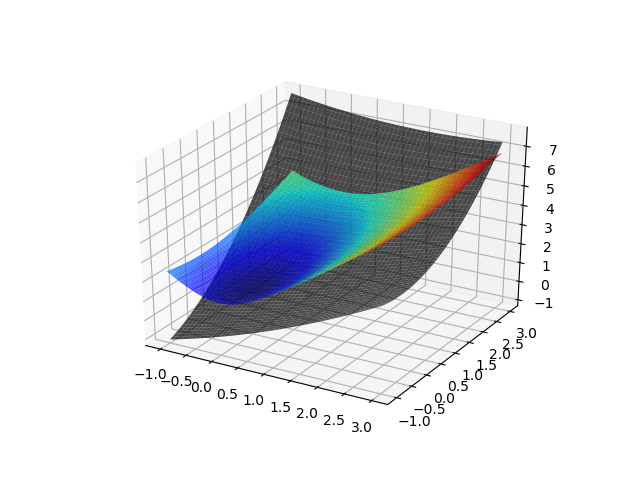

In [32]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot_surface(X,Y,F,cmap='jet',alpha=0.7)
ax1.plot_surface(X,Y,q,color = 'black',alpha = 0.7)

